## Data Context

#### Your are provided the grain seed dataset (grain_seed.csv) which contains samples of a mix of 3 different grain varieties seeds called: "Kama", "Rosa" and "Canadian". Each data point in the dataset is measure by the following features:

* area : area of the seed
* perimeter : paremeter of the seed
* compactness: compactness of the seed
* length : length of the seed
* width : width of seed
* asymmetry_coefficient
* groove_length 
* grain_variety : grain of the seed, either "Kama", "Rosa" or "Canadian"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(1)

Load the dataset

In [2]:
data_df = pd.read_csv("/Users/mzwakhebesho/Documents/dpy_exam_prep/seeds.csv")

In [3]:
data_df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat


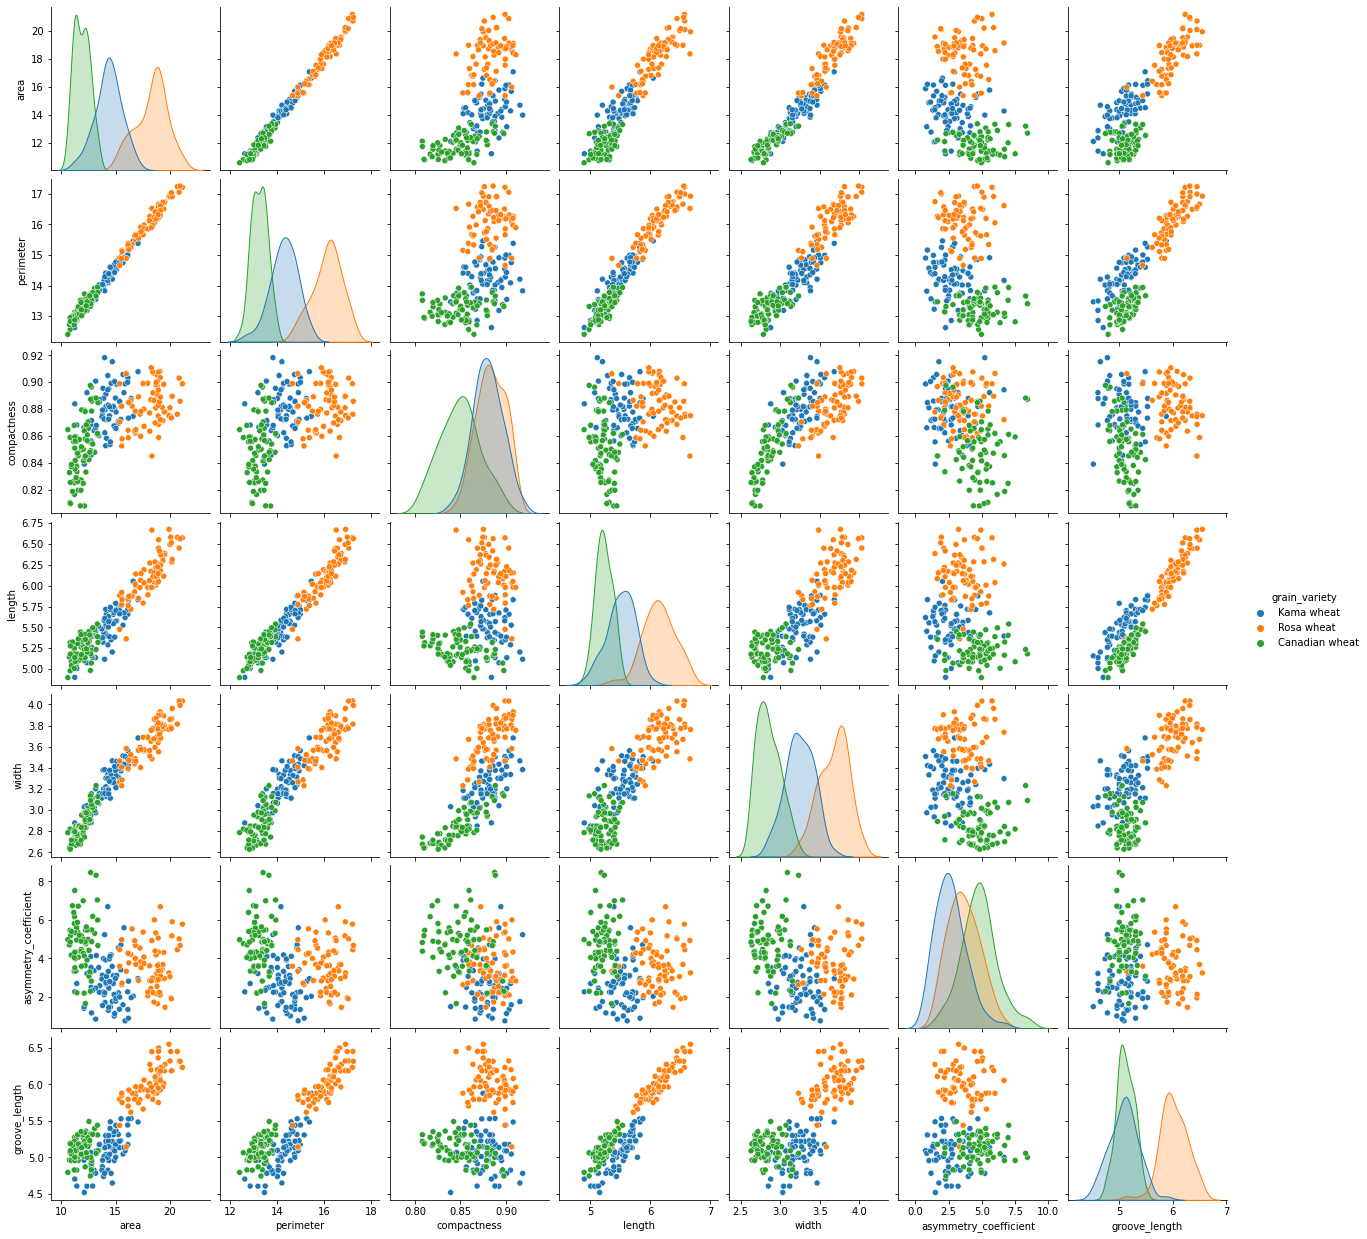

In [4]:
sns.pairplot(data_df,hue="grain_variety")

Create a variable called grain_variety that is a list of the "grain_variety" column in data_df

In [5]:
grain_variety = list(data_df['grain_variety'])

delete the "grain_variety" column from the data_df dataframe

In [6]:
del data_df['grain_variety']

<AxesSubplot:>

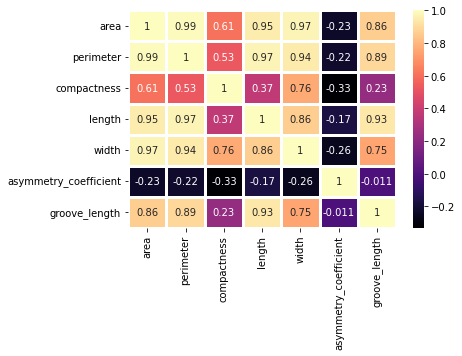

In [7]:
#heat map

sns.heatmap(data_df.corr(),annot=True, cmap='magma', linecolor='white', linewidths=3)


LETS DO CLUSTERING!!!!!!!!

First: Get Elbo for kmeans

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


ks = range(1, 11)
wcss = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(data_df)

    # Append the inertia to the list of inertias
    wcss.append(model.inertia_)



/home/tshepiso/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


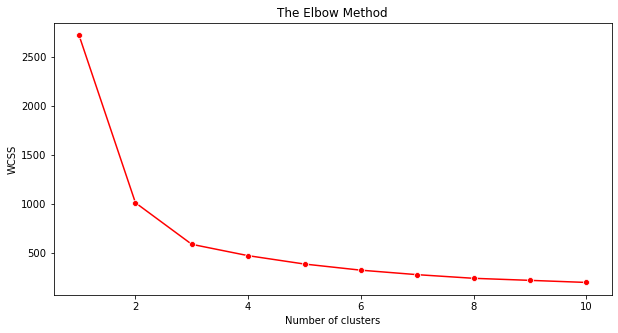

In [10]:
plt.figure(figsize=(10,5))

sns.lineplot(range(1, 11), wcss,marker='o',color='red')

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow is 3. Lets fit kmeans again

In [12]:
kmeans = KMeans(3)

kmeans.fit(data_df)

cluster_labels = kmeans.labels_
data_df["cluster_labels"] = cluster_labels

In [13]:
data_df.tail()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,cluster_labels
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,0
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,0


# PCA

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_df)

PCA()

In [15]:
pca.explained_variance_ratio_

array([7.96420001e-01, 1.70370057e-01, 2.74231605e-02, 4.72953889e-03,
       7.60227749e-04, 2.00066267e-04, 9.50474950e-05, 1.90025191e-06])

# Plot of explained variance

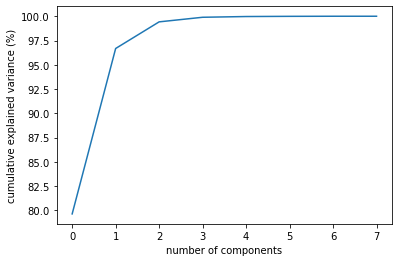

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_ *100))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance (%)');

In [23]:
pca = PCA(2)
pca.fit(data_df)
data_pca_array = pca.transform(data_df) # retuens array and not pandas dataframe

In [21]:
data_pca_df.shape

(210, 2)

In [24]:
data_pca_array.shape

(210, 2)

In [25]:
data_pca_df = pd.DataFrame(data_pca_array, columns = ['PCA1','PCA2'])  #convert array to pandas so we can plot easier
data_pca_df["cluster_labels"] = cluster_labels # Add cluster labes

In [26]:
data_pca_df.head()

,PCA1,PCA2,cluster_labels
0,0.789021,-1.641533,2
1,0.453927,-2.860928,2
2,-0.528054,-1.434351,2
3,-0.916260,-1.914597,2
4,1.745387,-2.323881,2


<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

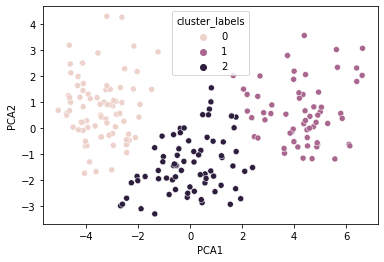

In [27]:
sns.scatterplot(x="PCA1",y="PCA2",data=data_pca_df,hue="cluster_labels")

# Crosstab for evaluation

In [28]:
eval_df = pd.DataFrame({'cluster_labels': cluster_labels, 'grain_variety': grain_variety})

In [32]:
eval_df.head()

,cluster_labels,grain_variety
0,2,Kama wheat
1,2,Kama wheat
2,2,Kama wheat
3,2,Kama wheat
4,2,Kama wheat


In [33]:
eval_df.tail()

,cluster_labels,grain_variety
205,0,Canadian wheat
206,0,Canadian wheat
207,0,Canadian wheat
208,0,Canadian wheat
209,0,Canadian wheat


In [31]:
ct = pd.crosstab(eval_df['cluster_labels'], eval_df['grain_variety'])
ct

grain_variety,Canadian wheat,Kama wheat,Rosa wheat
cluster_labels,,,
0,68,9,0
1,0,1,60
2,2,60,10
